# SSS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sss_data = pd.read_csv('brrrr.txt',delimiter='	')
sss_data.head()

temperture (K) - Plot 0  voltage (V) - Plot 0
0                     39.2              0.000083
1                     38.3              0.000083
2                     37.6              0.000083
3                     36.9              0.000082
4                     36.2              0.000082

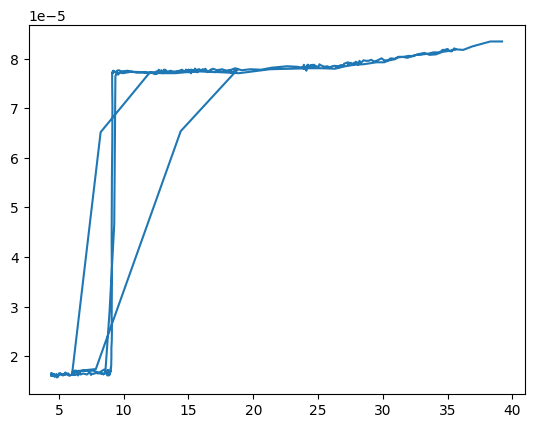

In [3]:
temp = sss_data['temperture (K) - Plot 0']
voltage = sss_data['voltage (V) - Plot 0']

plt.plot(temp,voltage)
plt.show()

In [4]:
sss_clean = sss_data.loc(0)[:400]

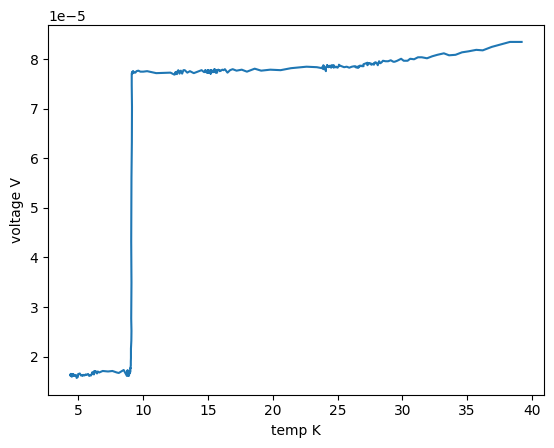

In [5]:
temp1 = sss_clean['temperture (K) - Plot 0']
voltage1 = sss_clean['voltage (V) - Plot 0']

plt.plot(temp1,voltage1)
plt.xlabel('temp K')
plt.ylabel('voltage V')
plt.show()

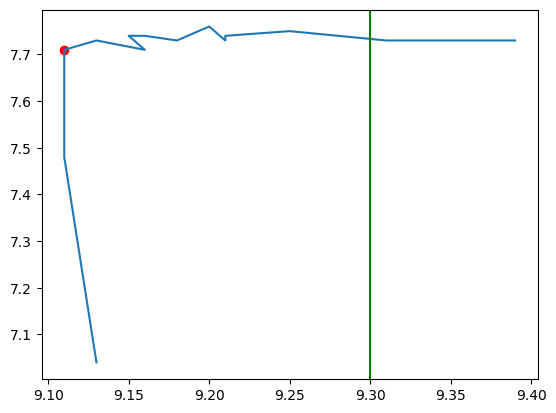

In [6]:

sss_select = sss_clean[sss_clean['temperture (K) - Plot 0']<=9.4]#, sss_clean['temperture (K) - Plot 0']>=9]
sss_select = sss_select[sss_select['temperture (K) - Plot 0']>=8]
sss_select['voltage (V) - Plot 0'] = sss_select['voltage (V) - Plot 0'] * 10**5
sss_select = sss_select[sss_select['voltage (V) - Plot 0']>=7]

plt.plot(sss_select['temperture (K) - Plot 0'],sss_select['voltage (V) - Plot 0'])
plt.scatter(9.11,7.71, color = 'r')
plt.axvline(9.3, color = 'g')
plt.show()

Nb causes for lower tc
- impurities
- measured from bulk

In [7]:
sss_select

temperture (K) - Plot 0  voltage (V) - Plot 0
205                     9.39                  7.73
206                     9.35                  7.73
207                     9.31                  7.73
208                     9.25                  7.75
209                     9.21                  7.74
210                     9.21                  7.73
211                     9.20                  7.76
212                     9.18                  7.73
213                     9.16                  7.74
214                     9.15                  7.74
215                     9.15                  7.74
216                     9.16                  7.71
217                     9.13                  7.73
218                     9.11                  7.71
219                     9.11                  7.48
220                     9.13                  7.04

# SIS

Sample data

In [8]:
sis_data = pd.read_csv('SIS-1.txt',delimiter=' ',skiprows=1)
sis_data.head()

Current(mA)  Voltage(mV)
0        0.000     0.000545
1        0.005     0.000521
2        0.010     0.000513
3        0.015     0.000497
4        0.020     0.000518

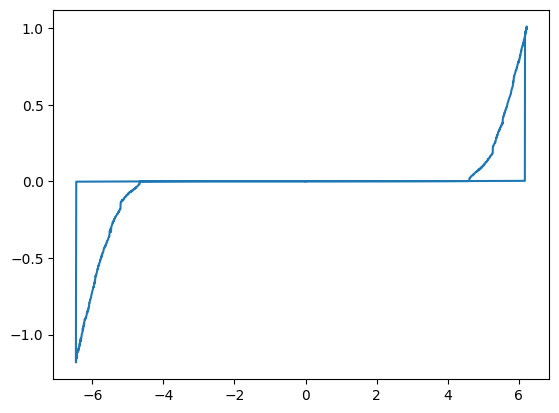

In [9]:
plt.plot(sis_data['Current(mA)'],sis_data['Voltage(mV)'])
plt.show()

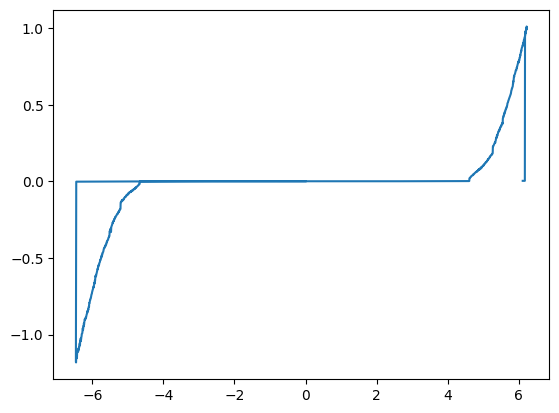

In [10]:
sis_selection = sis_data.loc(0)[1223:]
plt.plot(sis_selection['Current(mA)'],sis_selection['Voltage(mV)'])
plt.show()

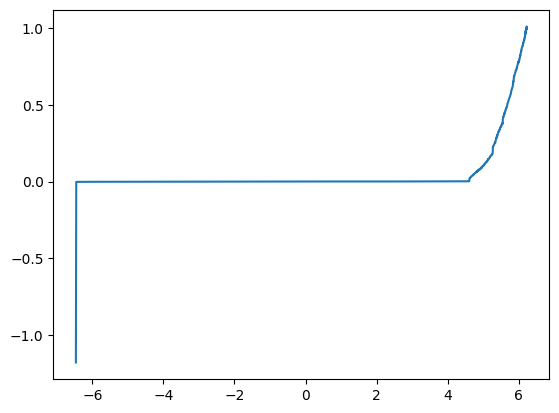

In [11]:
sis_selection = sis_data.loc(0)[1236:3785]
plt.plot(sis_selection['Current(mA)'],sis_selection['Voltage(mV)'])
plt.show()

Just interesting parts

In [12]:
sis_data

Current(mA)  Voltage(mV)
0           0.000     0.000545
1           0.005     0.000521
2           0.010     0.000513
3           0.015     0.000497
4           0.020     0.000518
...           ...          ...
5074       -0.020     0.000150
5075       -0.015     0.000158
5076       -0.010     0.000185
5077       -0.005     0.000186
5078       -0.000     0.000148

[5079 rows x 2 columns]

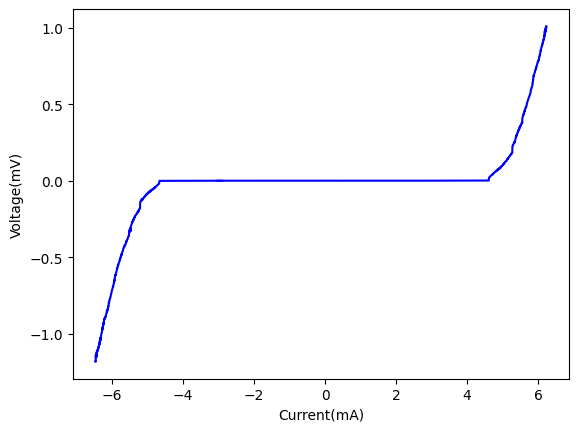

In [13]:
effects1 = sis_data.iloc[3785:4500]
effects2 = sis_data.iloc[1236:3100]
plt.plot(effects1['Current(mA)'],effects1['Voltage(mV)'], color = 'blue')
plt.plot(effects2['Current(mA)'],effects2['Voltage(mV)'], color = 'blue')
plt.xlabel('Current(mA)')
plt.ylabel('Voltage(mV)')
plt.show()

Where is $i_c$, the critical current?

In [32]:
effects = pd.concat((effects2,effects1))

effects

Current(mA)  Voltage(mV)
1236        6.180     0.951028
1237        6.185     0.976792
1238        6.190     0.966650
1239        6.195     0.976929
1240        6.200     0.981297
...           ...          ...
4495       -2.915     0.000155
4496       -2.910     0.000179
4497       -2.905     0.000190
4498       -2.900     0.000124
4499       -2.895     0.000150

[2579 rows x 2 columns]

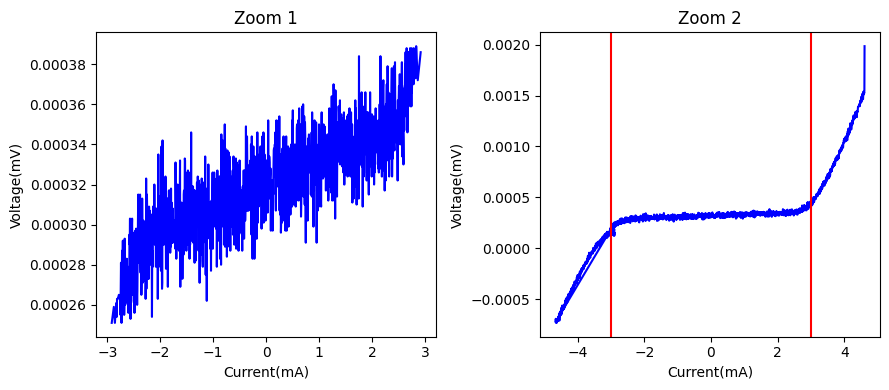

In [90]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 4))

zoom1 = effects[effects['Voltage(mV)']<.00039]
zoom1 = zoom1[zoom1['Voltage(mV)']>.00025]
zoom2 = effects[abs(effects['Voltage(mV)'])<.005] 


ax0.plot(zoom1['Current(mA)'], zoom1['Voltage(mV)'], color='blue')
ax0.set_xlabel('Current(mA)')
ax0.set_ylabel('Voltage(mV)')
ax0.set_title('Zoom 1') 

ax1.plot(zoom2['Current(mA)'], zoom2['Voltage(mV)'], color='blue')
ax1.set_xlabel('Current(mA)')
ax1.set_ylabel('Voltage(mV)')
ax1.set_title('Zoom 2')
ax1.axvline(-3, color = 'r')
ax1.axvline(3, color = 'r')

plt.tight_layout();

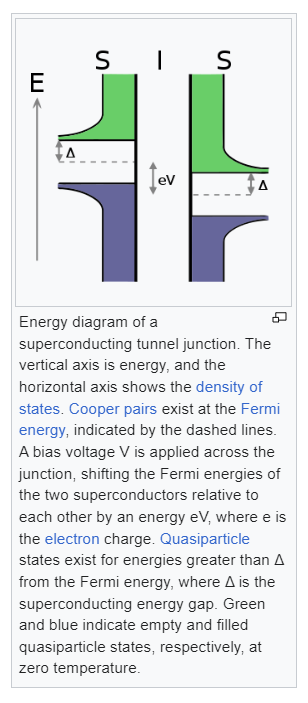 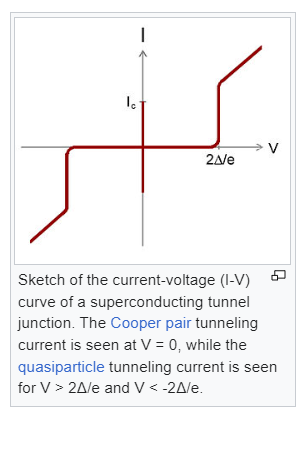

[Wikipedia: Superconducting tunnel junction](https://en.wikipedia.org/wiki/Superconducting_tunnel_junction)